In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import time
import scipy.io
import matplotlib.pyplot as plt
from SNN_JHK_v2_230313 import *
from Stimulation import *

0.0


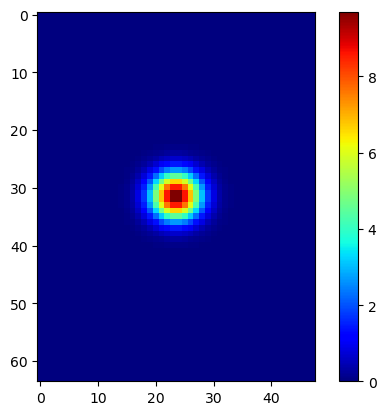

In [2]:
sensor_h, sensor_w = 19, 16 #(mm)
pixel_h, pixel_w = 64, 48
img_FPS = 60
F = 10

start_time = time.time()
stim_dot = dot_stim(sensor_w/2,sensor_h/2,F=F,pixel_h=pixel_h,pixel_w=pixel_w)
end_time = time.time()
print(end_time - start_time)
plt.imshow(stim_dot, cmap='jet')
plt.colorbar()
plt.show()

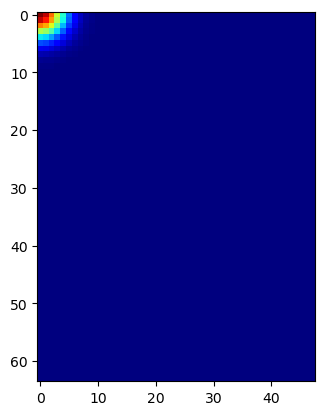

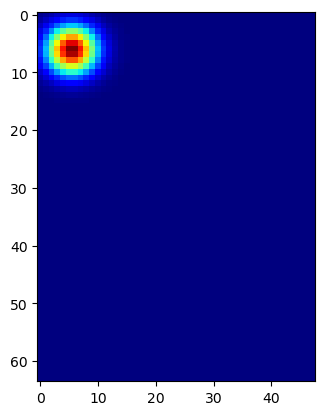

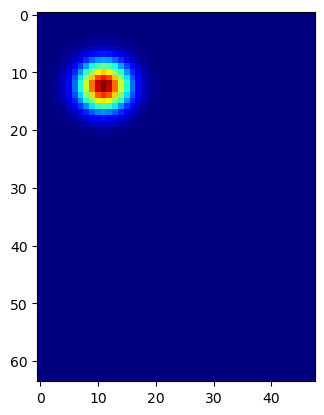

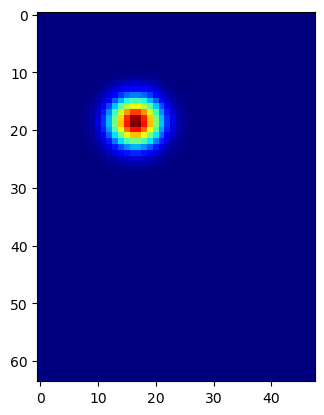

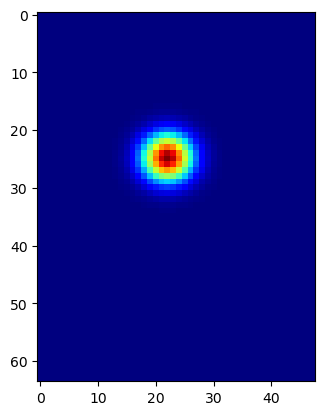

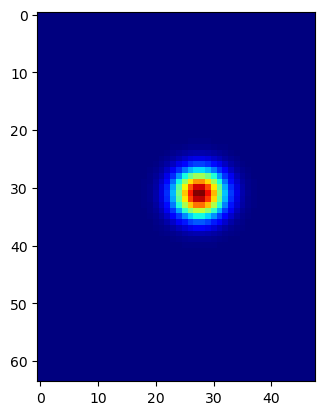

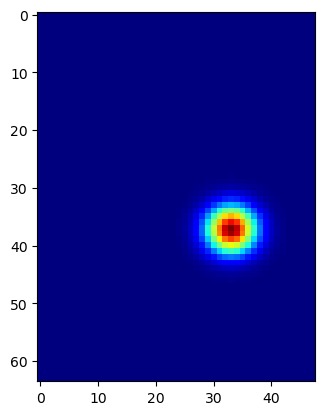

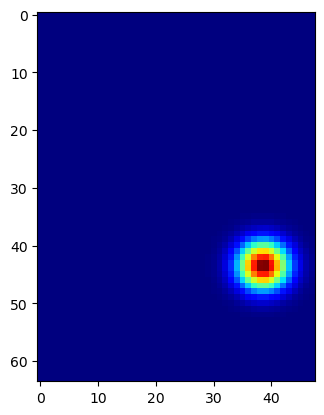

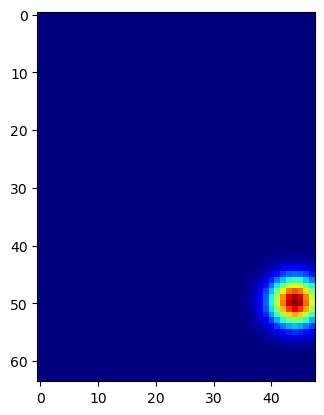

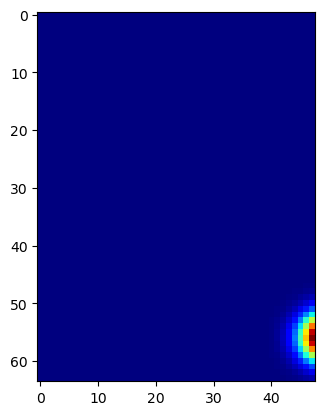

In [3]:
num_stim = 10000

# Generate the stimuli and stack them up
stimulation_left2right = np.zeros((pixel_h, pixel_w, num_stim))

for i in range(num_stim):
    x0 = i * 0.3/160  # Move the stimulus by 0.3mm for each frame
    y0 = i * 0.3/160
    stim_dot = dot_stim(x0, y0, F=F, pixel_h=pixel_h, pixel_w=pixel_w)
    stimulation_left2right[:, :, i] = stim_dot
    if i % 1000 == 0:
        plt.imshow(stimulation_left2right[:, :, i], cmap='jet')
        plt.show()



In [4]:

# receptiveField = [np.array([[20]]),np.array([[5,5],[5,5]]),np.array([[-2,10,-2]])]
receptiveField = [np.array([[100]])]

rf1=[np.ones((30,30))]

rf = createReceptiveField_oneFinger(rf1, pixel_h, pixel_w)

weights = Synapse(rf)


Complete! Create 30x30 kernel! with 665 times.


In [30]:
rf = createReceptiveField_oneFinger_withStep(rf1, pixel_h, pixel_w,step_size=10)

tmp = rf[7].reshape(pixel_h,pixel_w)

Complete! Create 30x30 kernel with step size 10! Generated 8 times.


In [31]:
L1_num_neurons = pixel_h * pixel_w
print(L1_num_neurons)
input_layer = IzhikevichLayer(0.02, 0.2, -65, 8, L1_num_neurons)

signal_length = stimulation_left2right.shape[-1]
print(signal_length)
print(input_layer.v.shape)
print(input_layer.u.shape)

3072
layer initialized
10000
(3072,)
(3072,)


In [34]:
S1 = Synapse(rf)

L2_num_neurons = len(rf)
print('# of Nueons in L2 is ',L2_num_neurons)

second_layer = IzhikevichLayer(0.02, 0.2, -65, 8, L2_num_neurons)

# of Nueons in L2 is  8
layer initialized


In [33]:
# simulation

input_signal = stimulation_left2right

input_layer_spike_times = np.zeros((L1_num_neurons, signal_length))
second_layer_spike_times = np.zeros((L2_num_neurons, signal_length))

start_time = time.time()

for i in range(signal_length):

    I = input_signal[:,:,i].reshape(-1)*10
    input_layer.update(I)

    post_input = weights.cal_post_input(input_layer.spikes)
    
    second_layer.update(post_input)

    input_layer_spike_times[:, i] = input_layer.spikes
    second_layer_spike_times[:, i] = second_layer.spikes
        


end_time = time.time()


vectorized_time = end_time - start_time

print(vectorized_time)

plot_spike_times(input_layer_spike_times)
plot_spike_times(second_layer_spike_times)

print(np.sum(input_layer_spike_times))

ValueError: operands could not be broadcast together with shapes (8,) (665,) 

In [7]:
a = np.ones((42,1))
a[0]= 0

print(a.shape)
print(rf.shape)

b = np.dot(rf,a)

print(b.shape)

(42, 1)
(42, 42)
(42, 1)


In [26]:
# create a random array with shape (64, 48)
arr = np.random.rand(64, 48)

# reshape the array to shape (3072, 1)
arr_reshaped = arr.reshape(-1, 1)
print(arr_reshaped.shape)


(3072, 1)


In [8]:
# Define input
x = np.array([1, 2, 3])

print(x.shape)
# Define weight and bias
w = np.array([0.5, -0.2, 0.1])
b = 0.3
print(w.shape)
# Compute output
y = np.dot(w, x) + b

# Print output
print(y)


(3,)
(3,)
0.7
